In [1]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");

v3.1


v3.0


v2.1


In [2]:
Params = []
DT, v0, DR, N, Δx, Lx, Ly, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 20.0, 0.5, 1e-5, 0.01);
# T, save_interval, param_name, pert = (0.1, 0.001, "periodic_solon_test", "lin")
T, save_interval, param_name, pert = (4000.0, 1.0, "periodic_unstbale_region", "lin")
Lx = 40.0
ϕas = fill(0.5,10)
ϕps = collect(0.26:0.02:0.35)
map(ϕas, ϕps) do ϕa, ϕp
        param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
        push!(Params,param)
end
map(lin_pert_values, Params)
#
DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 20.0, 0.5, 0.35, 0.3, 1e-5, 0.1);
#T, save_interval, param_name = (19.8, 0.01, "fig_1")
T, save_interval, param_name = (4000.0, 1.0, "periodic_stab_plot")
Lx = 40.0
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true)
    push!(Params,param)
param = Params[5];
map(lin_pert_values, Params)

6-element Vector{Tuple{Float64, ComplexF64, Vector{ComplexF64}}}:
 (0.15707963267948966, 0.005294570950949396 - 0.004610874604896906im, [0.6136343182703403 - 0.09898781199393772im, 0.780519860761378 + 0.0im, 0.020498856931825606 + 0.06342618023399277im])
 (0.15707963267948966, 0.004103612710747252 - 0.005721056284698002im, [0.6011258798123764 - 0.1468942335131217im, 0.7824080219461941 + 0.0im, 0.02957905987899199 + 0.06350218257121551im])
 (0.15707963267948966, 0.0028220680250403965 + 0.006365825953013126im, [0.5840179777728688 + 0.19981485122110884im, 0.7832817808032297 + 0.0im, -0.039096440376096706 + 0.0627546578447764im])
 (0.15707963267948966, 0.0014626280374108569 - 0.006640544318158487im, [0.5593507903945975 - 0.26249201037479203im, 0.7823366503517767 + 0.0im, 0.04986879706575838 + 0.06072154782213101im])
 (0.15707963267948966, 3.765305391467569e-5 + 0.006556975184274727im, [0.5211644564069622 + 0.3406662711858864im, 0.7779474050533355 + 0.0im, -0.06279030076796355 + 0.056474013

In [4]:
Params = []
DT, v0, DR, N, Δx, Lx, Ly, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 20.0, 0.5, 1e-5, 0.1);
# T, save_interval, param_name, pert = (0.1, 0.001, "periodic_solon_test", "lin")
T, save_interval, param_name, pert = (12000.0, 10.0, "periodic_unstbale_region", "lin")
Lx = 100.0
ϕas = fill(0.5,10)
ϕps = collect(0.26:0.02:0.35)
map(ϕas, ϕps) do ϕa, ϕp
        param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
        push!(Params,param)
end
#map(lin_pert_values, Params)
param = Params[3]; 

full load


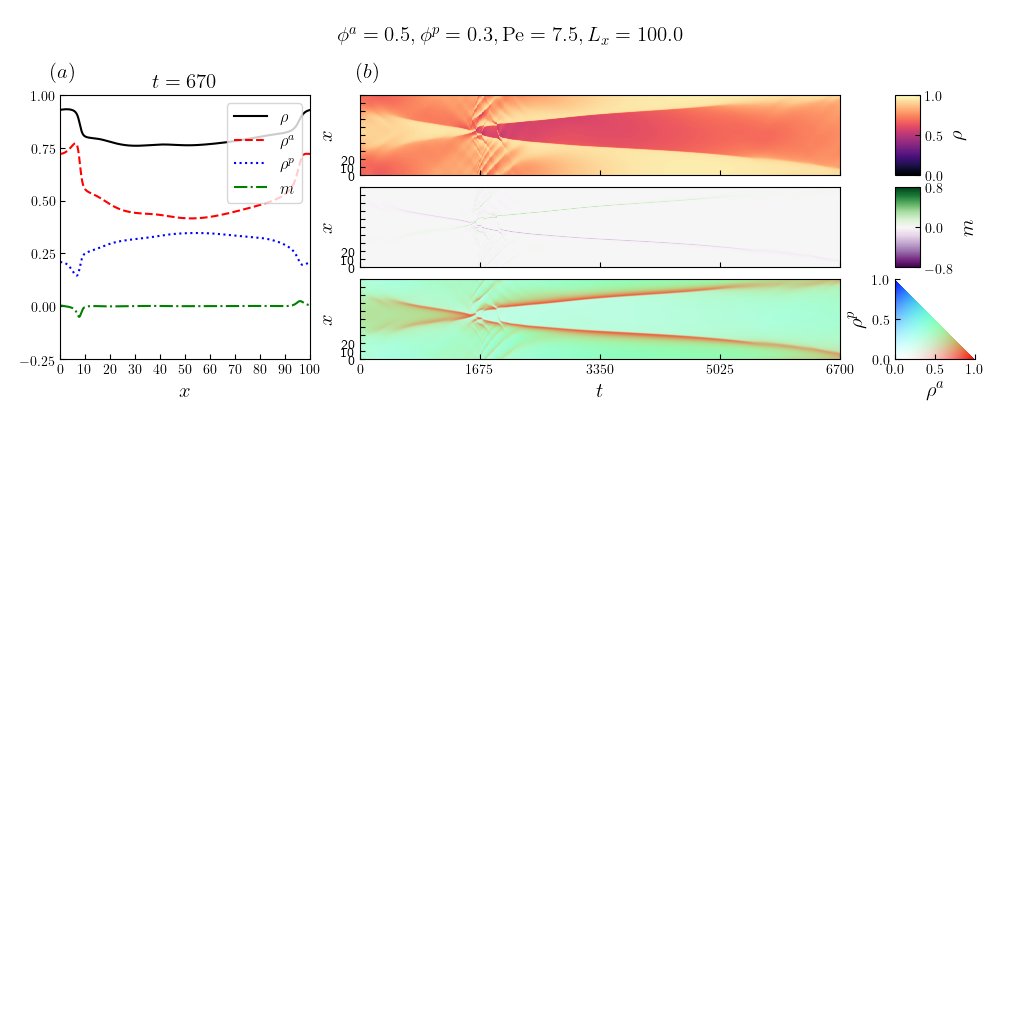

saved


In [5]:
@unpack Nx = param
using KernelDensitySJ, Peaks

#load saves
ts, f_saves = load_compress_pde(param)
#process
    ft      = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
    # ft      = ft[t_start:1:t_end, : ,: ]
    # ts      = ts[t_start:1:end]
    pk      = find_xpeak_ft(ts , ft; time_length = 0.1)
    centre  = Nx ÷ 2 + 1 
    ft  = circshift(ft, (0,-pk, 0));

    t_pde_rgb_image = rho_to_rgb(ft);
    dt, df = t_dff(ts , ft; N=Nx);

    fts = [ft]
    times = [ts]
    images = [t_pde_rgb_image]
    dts = [dt]
    dfs = [df];

t_max = maximum(ts)
@unpack Lx = param
    rhomax  = 1.0
    rhomin  = 0.0
    mag_lim = 0.8
    height_1 = 0.08
    width_1  = 0.48 #2*0.365
    side_gap_1  = 0.35
    bottom_gap_1  = 0.65
    gap = 0.012

    cbar_y_top = bottom_gap_1 + 3*height_1 + 2*gap
    cbar_width = 0.1
    cbar_y_bot = bottom_gap_1+ gap+ height_1#bottom_gap_1 + cbar_width + 0.02
    cbar_x = 0.885 #1- cbar_width#2*width_1+ 3*side_gap_1


    height_2 = 0.175
    width_2  = height_2
    side_gap_2  = 0.1
    bottom_gap_2  = bottom_gap_1
    gap_2 = 0.06

    t_stamp_x = 0.03
    t_stamp_y = 0.05

    width_3 = 0.25
    start_3 = 0.05

    font = 15

    sf = 1.0
#create plot
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,Int64(10*sf)))
    ax = fig.add_axes([0,0,1,1],visible=true)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.spines["bottom"].set_visible(false)
    ax.spines["left"].set_visible(false)
    # ax = fig.add_axes([0.775,0,0.225,1],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
    # ax = fig.add_axes([0.025,0.5,0.95,0.45],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
# add image
    for (i,(rgb_image,ts)) in enumerate(zip(images, times))
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        ax.imshow(rgb_image; extent = [t_start,t_end,0,Lx], interpolation = "bilinear")
        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.get_yaxis().set_ticks(0:10.0:Lx)
        ax.set_yticklabels(["0","10","20"])
        ax.get_xaxis().set_ticks([])
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.set_xlabel(L"t", fontsize = font)
        ax.tick_params(labelbottom = true, direction = "in")
    end
# add mats
    for (i,(ts,ft)) in enumerate(zip(times, fts))
        global im1, im2
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1+2*height_1+2*gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        _, Nx, _ = size(ft)

        colmap = PyPlot.plt.cm.magma
        norm1 = matplotlib.colors.Normalize(vmin= rhomin, vmax= rhomax) 
        im1 = ax.matshow((ft[:,Nx:-1:1,1]+ft[:,Nx:-1:1,2]+ft[:,Nx:-1:1,3])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])

        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.xaxis.set_ticks([])
        ax.xaxis.tick_bottom()
        ax.get_yaxis().set_ticks(0:10.0:Lx)
        ax.set_yticklabels(["0","10","20"])
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")

        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1+height_1+gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]

        colmap = PyPlot.plt.cm.PRGn
        norm1 = matplotlib.colors.Normalize(vmin= -mag_lim, vmax= mag_lim) 
        im2 = ax.matshow((ft[:,Nx:-1:1,2]-ft[:,Nx:-1:1,1])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])
        
        ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        # ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks(0:10.0:Lx)
        ax.set_yticklabels(["0","10","20"])
        ax.xaxis.tick_bottom()
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")
    end
# add tdiff
    #     for (i,(ts, df)) in enumerate(zip(dts, dfs))
    #         ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1-height_1-gap, width_1, height_1])
    #         t_end = ts[end]
    #         t_start = ts[1]
    #         t_max = t_end -t_start
    #         ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # if i ==1
    #         #     smooth_df = KernelDensitySJ.smooth(ts[2:end],df[2:end],0.2, ts[2:end])
    #         #     ax.plot(ts[2:end], smooth_df; color = "black")
    #         # else
    #         #     ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # end
    #         #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
            
    #         #ax.get_xaxis().set_ticks([])
    #         ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
    #         ax.get_yaxis().set_ticks(0:0.04:0.04)
    #         ax.axis([t_start,t_end, 0, 0.04])
    #         ax.set_aspect((t_max/0.04)*(height_1/width_1)*sf)
    #         ax.set_ylabel(L"\Vert \dot f \Vert_2",fontsize = 15, rotation = 90)
    #         ax.set_xlabel(L"t", fontsize = font)
    #         ax.tick_params(labelbottom = true, direction = "in")
    # end
# add end plot  
    frame = length(ts)-1
    ax = fig.add_axes([start_3, bottom_gap_2, width_3, 3*height_1+2*gap])
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]+ft[frame,:,1]+ft[frame,:,3];
    color = "black", linestyle = "-", label = L"\rho")
    ax.plot(Δx:Δx:Lx, ft[frame,:,1]+ft[frame,:,2]; 
    color = "red", linestyle = "--", label = L"\rho^a")
    ax.plot(Δx:Δx:Lx, ft[frame,:,3]; 
    color = "blue", linestyle = ":",label = L"\rho^p")
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]-ft[frame,:,1]; 
    color = "green", linestyle = "-.", label = L"m")
    

    latex_string = latexstring("\$ t = $(frame)\$")
    ax.set_title(latex_string, fontsize = font)
    ax.get_xaxis().set_ticks(0:10.0:Lx)
    ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
    # ax.set_xlabel(L"x", fontsize = 15)
    #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
    ax.set_aspect((3*height_1+2*gap)*(Lx/(1.25))/(width_3))
    ax.axis([0,Lx,-0.25,1.0])
    ax.tick_params(direction = "in")
    ax.legend(loc= "upper right", fontsize = 12)
    ax.set_xlabel(L"x", fontsize = 15)

# add colour bars
    # ap cbar
    # cbar_ax = fig.add_axes([cbar_x, bottom_gap_1, cbar_width, cbar_width])
    cbar_ax = fig.add_axes([cbar_x, bottom_gap_2, height_1, height_1])

    Δ = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δ:Δ:1, y in Δ:Δ:1, i in 1:3 ]  
    rgb_image = rho_to_rgb(cbar_f );

    ax = cbar_ax
    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = font)
    ax.set_ylabel(L"\rho^p",fontsize = font, rotation = 90)
    ax.tick_params(direction = "in")
    # rho cbar
    # rho_cbar_ax = fig.add_axes([0.9, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    rho_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot+gap+height_1, 0.025, height_1])
    rho_cbar = fig.colorbar(im1, cax=rho_cbar_ax)
    # rho_cbar_ax.set_title(L"\rho",fontsize=25)
    rho_cbar_ax.set_ylabel(L"\rho",fontsize=font,rotation = 90)
    rho_cbar.set_ticks( rhomin:0.5:rhomax)
    rho_cbar_ax.yaxis.set_ticks_position("right")
    rho_cbar_ax.tick_params(direction = "in")
    # mag cbar
    # mag_cbar_ax = fig.add_axes([0.935, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    mag_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot, 0.025, height_1])
    # mag_cbar_ax.set_title(L"{m}",fontsize=25) #mathbf{}
    mag_cbar = fig.colorbar(im2, cax=mag_cbar_ax)
    mag_cbar.set_ticks((-mag_lim):0.8:mag_lim)
    mag_cbar_ax.tick_params(direction = "in")
    mag_cbar_ax.yaxis.set_ticks_position("right")
    mag_cbar_ax.set_ylabel(L"m",fontsize=font,rotation = 90)
#
#title
    @unpack v0, ϕa, ϕp, Lx = param
    latex_title = latexstring("\$ \\phi^a = $(ϕa), \\phi^p = $(ϕp), \\mathrm{Pe} = $(v0), L_x = $(Lx)\$")
    fig.suptitle(latex_title,fontsize=font)
# labels
    #latex_annotation = latexstring("\$ t = $(round( times[1][end];digits = 1))\$")
    ax.annotate(L"(a)", (start_3, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
    ax.annotate(L"(b)", (side_gap_1, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
display(fig)
fig_name = "pde_plot"
     @unpack ϕa, ϕp, v0, Lx = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/ϕa=$(ϕa)_ϕp=$(ϕp)_v0=$(v0)_Lx=$(Lx).pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


In [15]:
@unpack Nx = param
using KernelDensitySJ, Peaks

#load saves
ts, f_saves = load_compress_pde(param)
#process
    ft      = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
    # ft      = ft[t_start:1:t_end, : ,: ]
    # ts      = ts[t_start:1:end]
    pk      = find_xpeak_ft(ts , ft; time_length = 0.1)
    centre  = Nx ÷ 2 + 1 
    ft  = circshift(ft, (0,-pk, 0));

    t_pde_rgb_image = rho_to_rgb(ft);
    dt, df = t_dff(ts , ft; N=Nx);

    fts = [ft]
    times = [ts]
    images = [t_pde_rgb_image]
    dts = [dt]
    dfs = [df];

full load


saved


In [ ]:
#create parameters
Params = []
DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 20.0, 0.5, 0.35, 0.3, 1e-5, 0.1);
#T, save_interval, param_name = (19.8, 0.01, "fig_1")
T, save_interval, param_name = (1000.0, 1.0, "periodic_stab_plot")
Lxs = [20.0,40.0,100.0]
map(Lxs) do Lx
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true)
    push!(Params,param)
end
param = Params[3];
map(lin_pert_values, Params)

3-element Vector{Tuple{Float64, ComplexF64, Vector{ComplexF64}}}:
 (0.3141592653589793, -0.010849955436066136 - 0.06798383503896478im, [0.7221429562820239 + 0.0im, 0.6432984709896314 + 0.23497905416914122im, 0.059531888413142844 + 0.07692480925164577im])
 (0.15707963267948966, -0.002824460572809625 - 0.017333379026767005im, [0.7267341357757481 + 0.0im, 0.6444717691749711 + 0.23258837161103613im, 0.030549887067048073 + 0.038509588757555974im])
 (0.06283185307179587, -0.0004576907334007324 - 0.0027888687026606457im, [0.7280585123172181 + 0.0im, 0.6447890435259687 + 0.23192451277845885im, 0.012310768833623987 + 0.015406405632245457im])

In [ ]:
Params = []
DT, v0, DR, N, Δx, Lx, Ly, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 20.0, 0.5, 1e-5, 0.1);
# T, save_interval, param_name, pert = (0.1, 0.001, "periodic_solon_test", "lin")
T, save_interval, param_name, pert = (1000.0, 1.0, "periodic_stab_plot", "lin")
Lxs = [Lx]
ϕas = collect(0.35:0.01:0.38)
ϕps = fill(0.3,4)
map(ϕas, ϕps) do ϕa, ϕp
    for Lx in Lxs
        param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
        push!(Params,param)
    end
end
param = Params[4];
map(lin_pert_values, Params)

4-element Vector{Tuple{Float64, ComplexF64, Vector{ComplexF64}}}:
 (0.3141592653589793, -0.010849955436066136 - 0.06798383503896478im, [0.7221429562820239 + 0.0im, 0.6432984709896314 + 0.23497905416914122im, 0.059531888413142844 + 0.07692480925164577im])
 (0.3141592653589793, -0.006829005475576424 + 0.06451710521552835im, [0.714330064609788 + 0.0im, 0.6509962400843904 - 0.23646709846039046im, -0.0575285925335258 + 0.08191597266344722im])
 (0.3141592653589793, -0.0032458722064664515 + 0.06100409556659056im, [0.7065250365469685 + 0.0im, 0.6586885268266452 - 0.23739554248969028im, -0.05543211802054396 + 0.08673196675407957im])
 (0.3141592653589793, -8.210696530211797e-5 + 0.0574795698865091im, [0.6580758122731519 + 0.23486481800684506im, 0.7075207549373004 + 0.0im, -0.08088633397145388 + 0.0681654228568537im])

In [ ]:
Params = []
ϕas = collect(0.34:0.02:0.38)
ϕps = fill(0.3,3)
DT, v0, DR, N, Δx, Lx, Ly, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 20.0, 0.5, 1e-5, 0.1);
#T, save_interval, param_name = (19.8, 0.01, "fig_1")
T, save_interval, param_name, pert = (2000.0, 1.0, "periodic_pert_plot", "lin")
map(ϕas, ϕps) do ϕa, ϕp
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
    push!(Params,param)
end
param = Params[1];
map(lin_pert_values, Params)

3-element Vector{Tuple{Float64, ComplexF64, Vector{ComplexF64}}}:
 (0.3141592653589793, -0.015328684965140438 + 0.0713665091694729im, [0.7299612405407494 + 0.0im, 0.6356123957706182 - 0.2328828867785081im, -0.06141587134967906 + 0.07174344181187098im])
 (0.3141592653589793, -0.006829005475576424 + 0.06451710521552835im, [0.714330064609788 + 0.0im, 0.6509962400843904 - 0.23646709846039046im, -0.0575285925335258 + 0.08191597266344722im])
 (0.3141592653589793, -8.210696530211797e-5 + 0.0574795698865091im, [0.6580758122731519 + 0.23486481800684506im, 0.7075207549373004 + 0.0im, -0.08088633397145388 + 0.0681654228568537im])

In [22]:
f = f_saves[1]
print(mean(f[:,1]+f[:,2]))
print("   ")
print(mean(f[:,3]))

0.38000000000000006   0.3

In [28]:
f = f_saves[end]
perturb_pde!(f,param)
print(mean(f[:,1]+f[:,2]))
print("   ")
print(mean(f[:,3]))

0.380000000000027   0.29999999999991284

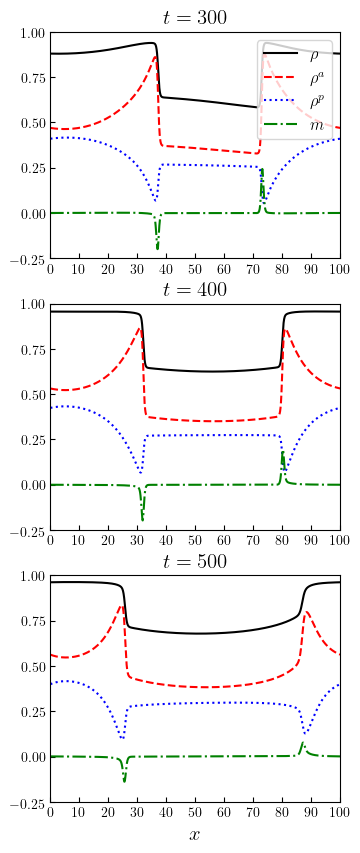

In [15]:
using PyPlot
PyPlot.close("all")
rc("text", usetex=true)
# frame = 1950
frames = [300,400,500]
fig, axs = subplots(3,1,figsize=(5,10))
for (ax,frame) in zip(axs, frames)
        ax.plot(Δx:Δx:Lx, ft[frame,:,2]+ft[frame,:,1]+ft[frame,:,3]; 
        color = "black", linestyle = "-", label = L"\rho")
        ax.plot(Δx:Δx:Lx, ft[frame,:,1]+ft[frame,:,2]; 
        color = "red", linestyle = "--", label = L"\rho^a")
        ax.plot(Δx:Δx:Lx, ft[frame,:,3]; 
        color = "blue", linestyle = ":",label = L"\rho^p")
        ax.plot(Δx:Δx:Lx, ft[frame,:,2]-ft[frame,:,1]; 
        color = "green", linestyle = "-.", label = L"m")
        

        latex_string = latexstring("\$ t = $(frame)\$")
        ax.set_title(latex_string, fontsize = 15)
        ax.get_xaxis().set_ticks(0:10.0:Lx)
        ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
        # ax.set_xlabel(L"x", fontsize = 15)
        #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
        ax.set_aspect((Lx/(2*mag_lim)))
        ax.axis([0,Lx,-0.25,1.0])
        ax.tick_params(direction = "in")
end
axs[1].legend(loc= "upper right", fontsize = 12)
axs[3].set_xlabel(L"x", fontsize = 15)
display(fig)
# fig_name = "wave_plot"
#     @unpack ϕa, ϕp, v0, Lx = param
#     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
#     mkpath(pathname)
#     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/ϕa=$(ϕa)_ϕp=$(ϕp)_v0=$(v0)_Lx=$(Lx).pdf";
#     PyPlot.savefig(filename,dpi = 100, format = "pdf") 